In [2]:
import os
from PIL import Image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imageio
import cv2

**Метод Оцу** є популярною технікою, яка використовується для порогового визначення зображення. Він розділяє зображення на два класи, передній план і фон, на основі значень інтенсивності відтінків сірого його пікселів.

- Крім того, метод Оцу використовує гістограму зображення в градаціях сірого для виявлення оптимального порогового значення, яке розділяє дві області з максимальною дисперсією між класами.

\begin{equation*} H(i) = \sum_{x=1}^{M}\sum_{y=1}^{N} [I(x,y) = i] \end{equation*}  


- Де M і N представляють ширину та висоту зображення відповідно, а [I(x,y) = i] – це функція, яка повертає одиницю (1), якщо піксель у позиції (x,y) має значення інтенсивності i та нуль (0) в іншому випадку.

q1 і q2 - це частини пікселів, які належать до двох класів (фон і об'єкт), які визначаються на основі порогу. mean1 і mean2 — середні значення яскравості пікселів для кожного класу. var1 і var2 – це дисперсії яскравості для кожного класу.

In [3]:
def bw_0(input_file):
    image_data = mpimg.imread(input_file)
    grayscale_array = image_data.mean(axis=-1)
    plt.imshow(grayscale_array, cmap=plt.get_cmap('gray'))
    plt.show()
    return image_data

In [4]:
def bw(input_file):
    
    gray_image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)
    
    threshold_value = np.mean(gray_image)
    height_dim, width_dim = gray_image.shape

    for row in range(height_dim):
        for col in range(width_dim):
            if gray_image[row][col] > threshold_value:
                gray_image[row][col] = 255  
            else:
                gray_image[row][col] = 0    

    plt.imshow(gray_image, cmap='gray')
    plt.show()
    return gray_image

In [5]:
def otsu(image):
    height, width = image.shape
    hist = np.zeros(256)

    for h in range(height):
        for w in range(width):
            pixel = image[h, w]
            hist[pixel] += 1

    total = height * width
    probs = hist / total

    max_variance = 0
    best_threshold = 0

    for t in range(256):
        q1 = sum(probs[:t])
        q2 = sum(probs[t:])

        if q1 == 0 or q2 == 0:
            continue

        mean1 = np.sum(np.arange(t) * probs[:t]) / q1
        mean2 = np.sum(np.arange(t, 256) * probs[t:]) / q2

        var1 = np.sum(((np.arange(t) - mean1) ** 2) * probs[:t]) / q1
        var2 = np.sum(((np.arange(t, 256) - mean2) ** 2) * probs[t:]) / q2

        result = q1 * var1 + q2 * var2

        if result > max_variance:
            max_variance = result
            best_threshold = t
            
    return best_threshold

In [6]:
def objectImage(input_image, input_file):

    original_img = cv2.imread(input_file)
    optimal_thresh = otsu(input_image)

    _, binary_mask = cv2.threshold(input_image, optimal_thresh, 255, cv2.THRESH_BINARY)

    inverted_mask = cv2.bitwise_not(binary_mask)

    img_with_alpha = cv2.cvtColor(original_img, cv2.COLOR_BGR2BGRA)

    img_with_alpha[:, :, 3] = inverted_mask

    output_filename = 'object_' + input_file.split('/')[-1] 
    output_path = 'output/' + output_filename  

    cv2.imwrite(output_path, img_with_alpha)
    
    cv2.imshow('Mask', binary_mask)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

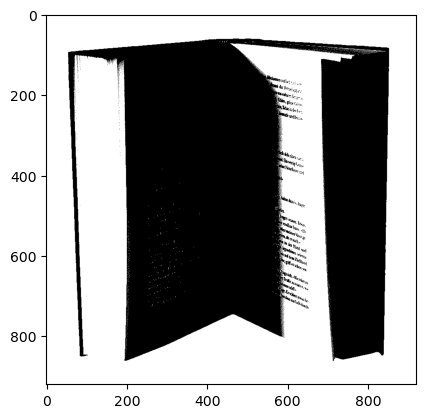

In [ ]:
input_file = "image.png"
bw_image = bw(input_file)

objectImage(bw_image, input_file)